# **IMPLEMENTING A GPT MODEL FROM SCRATCH TO GENERATE TEXT**

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

## **GPT ARCHITECTURE PART 1: DUMMY GPT MODEL CLASS**

Step 1: Use a placeholder for TransformerBlock

Step 2: Use a placeholder for LayerNorm

In [ ]:
import torch
import torch.nn as nn

# ===============================
# DummyGPTModel — A minimal GPT-like model structure
# ===============================
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        """
        Initialize the DummyGPTModel using the given configuration dictionary.

        Args:
            cfg (dict): A configuration dictionary containing model hyperparameters:
                - "vocab_size": Size of the token vocabulary.
                - "emb_dim": Dimensionality of token and positional embeddings.
                - "context_length": Maximum sequence length (number of positions).
                - "drop_rate": Dropout probability for embeddings.
                - "n_layers": Number of Transformer blocks.
        """
        super().__init__()

        # Embedding layer for tokens (converts token IDs into embedding vectors)
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])

        # Embedding layer for positional encodings (represents token position in sequence)
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])

        # Dropout layer applied after combining token and positional embeddings
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # A stack of "Transformer blocks" — here they are dummy placeholders
        # Each block would normally contain self-attention + feedforward layers.
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )

        # A final normalization layer (placeholder)
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])

        # Output layer that maps from embedding dimension to vocabulary size
        # Used to generate logits for each token in the vocabulary.
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        """
        Forward pass of the DummyGPTModel.

        Args:
            in_idx (torch.Tensor): Tensor of token indices with shape (batch_size, seq_len)

        Returns:
            logits (torch.Tensor): Output predictions (unnormalized probabilities)
                                   of shape (batch_size, seq_len, vocab_size)
        """
        # Extract batch size and sequence length from input
        batch_size, seq_len = in_idx.shape

        # Token embeddings: Convert token IDs to embedding vectors
        tok_embeds = self.tok_emb(in_idx)

        # Positional embeddings: Create embeddings for each position in the sequence
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))

        # Combine token embeddings with positional embeddings (broadcasting adds position info)
        x = tok_embeds + pos_embeds

        # Apply dropout regularization
        x = self.drop_emb(x)

        # Pass through a series of Transformer blocks (here, they do nothing)
        x = self.trf_blocks(x)

        # Apply final normalization (dummy layer)
        x = self.final_norm(x)

        # Compute output logits for each token position
        logits = self.out_head(x)

        return logits


# ===============================
# DummyTransformerBlock — Placeholder for a real Transformer block
# ===============================
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        """
        Placeholder Transformer block.
        In a real model, this would include:
            - Multi-head self-attention
            - Feed-forward neural network
            - Layer normalization
            - Residual connections
        """
        super().__init__()
        # No real operations here — just a placeholder for architecture structure

    def forward(self, x):
        """
        Forward pass through the dummy Transformer block.
        Simply returns the input tensor unchanged.
        """
        return x


# ===============================
# DummyLayerNorm — Placeholder for Layer Normalization
# ===============================
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        """
        Dummy LayerNorm initialization.
        In a real implementation, this would compute normalization over features.

        Args:
            normalized_shape (int): Number of features in the input tensor to normalize.
            eps (float): Small constant added to denominator for numerical stability.
        """
        super().__init__()
        # Placeholder — does not actually normalize the input

    def forward(self, x):
        """
        Forward pass through the dummy normalization layer.
        Simply returns the input tensor unchanged.
        """
        return x


The DummyGPTModel class in this code defines a simplified version of a GPT-like model using
PyTorch's neural network module (nn.Module).

The model architecture in the
DummyGPTModel class consists of token and positional embeddings, dropout, a series of
transformer blocks (DummyTransformerBlock), a final layer normalization
(DummyLayerNorm), and a linear output layer (out_head).

The configuration is passed in via
a Python dictionary, for instance, the GPT_CONFIG_124M dictionary we created earlier.

The forward method describes the data flow through the model: it computes token and
positional embeddings for the input indices, applies dropout, processes the data through
the transformer blocks, applies normalization, and finally produces logits with the linear
output layer.

The code above is already functional, as we will see later in this section after we prepare
the input data.

However, for now, note in the code above that we have used placeholders
(DummyLayerNorm and DummyTransformerBlock) for the transformer block and layer
normalization, which we will develop in later sections


Next, we will prepare the input data and initialize a new GPT model to illustrate its
usage.

### **STEP 1: TOKENIZATION**

In [ ]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


### **STEP 2: CREATE AN INSTANCE OF DUMMYGPTMODEL**

In [ ]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6755, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


The output tensor has two rows corresponding to the two text samples. Each text sample
consists of 4 tokens; each token is a 50,257-dimensional vector, which matches the size of
the tokenizer's vocabulary.


The embedding has 50,257 dimensions because each of these dimensions refers to a
unique token in the vocabulary. At the end of this chapter, when we implement the
postprocessing code, we will convert these 50,257-dimensional vectors back into token IDs,
which we can then decode into words.

Now that we have taken a top-down look at the GPT architecture and its in- and outputs,
we will code the individual placeholders in the upcoming sections, starting with the real
layer normalization class that will replace the DummyLayerNorm in the previous code.

## **GPT ARCHITECTURE PART 2: LAYER NORMALIZATION**

#### **Explanation with a simple example**

In [ ]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


The neural network layer we have coded consists of a Linear layer followed by a non-linear
activation function, ReLU (short for Rectified Linear Unit), which is a standard activation
function in neural networks.

If you are unfamiliar with ReLU, it simply thresholds negative
inputs to 0, ensuring that a layer outputs only positive values, which explains why the
resulting layer output does not contain any negative values.

(Note that we will use another,
more sophisticated activation function in GPT, which we will introduce in the next section).


Before we apply layer normalization to these outputs, let's examine the mean and
variance

In [ ]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


The first row in the mean tensor above contains the mean value for the first input row, and
the second output row contains the mean for the second input row.

Using keepdim=True in operations like mean or variance calculation ensures that the
output tensor retains the same number of dimensions as the input tensor, even though the
operation reduces the tensor along the dimension specified via dim.

For instance, without
keepdim=True, the returned mean tensor would be a 2-dimensional vector [0.1324,
0.2170] instead of a 2×1-dimensional matrix [[0.1324], [0.2170]].


For a 2D tensor (like a matrix), using dim=-1 for operations such as
mean or variance calculation is the same as using dim=1.

This is because -1 refers to the
tensor's last dimension, which corresponds to the columns in a 2D tensor.

Later, when
adding layer normalization to the GPT model, which produces 3D tensors with shape
[batch_size, num_tokens, embedding_size], we can still use dim=-1 for normalization
across the last dimension, avoiding a change from dim=1 to dim=2.

Next, let us apply layer normalization to the layer outputs we obtained earlier. The
operation consists of subtracting the mean and dividing by the square root of the variance
(also known as standard deviation)

In [ ]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


Note that the value 2.9802e-08 in the output tensor is the scientific notation for 2.9802 ×
10-8, which is 0.0000000298 in decimal form. This value is very close to 0, but it is not
exactly 0 due to small numerical errors that can accumulate because of the finite precision
with which computers represent numbers.

To improve readability, we can also turn off the scientific notation when printing tensor
values by setting sci_mode to False

In [ ]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


Let's now encapsulate this process in a PyTorch module that we can use in the GPT
model later

In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

This specific implementation of layer Normalization operates on the last dimension of the
input tensor x, which represents the embedding dimension (emb_dim).

The variable eps is a
small constant (epsilon) added to the variance to prevent division by zero during
normalization.

The scale and shift are two trainable parameters (of the same dimension
as the input) that the LLM automatically adjusts during training if it is determined that
doing so would improve the model's performance on its training task.

This allows the model
to learn appropriate scaling and shifting that best suit the data it is processing.

### **A small note on biased variance**

In our variance calculation method, we have opted for an implementation detail by
setting unbiased=False.

For those curious about what this means, in the variance
calculation, we divide by the number of inputs n in the variance formula.

This approach does not apply Bessel's correction, which typically uses n-1 instead of n in
the denominator to adjust for bias in sample variance estimation.

This decision results in a so-called biased estimate of the variance.

For large-scale language
models (LLMs), where the embedding dimension n is significantly large, the
difference between using n and n-1 is practically negligible.

We chose this approach to ensure compatibility with the GPT-2 model's normalization layers and because it
reflects TensorFlow's default behavior, which was used to implement the original GPT2 model.


Let's now try the LayerNorm module in practice and apply it to the batch input

In [ ]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


As we can see based on the results, the layer normalization code works as expected and
normalizes the values of each of the two inputs such that they have a mean of 0 and a
variance of 1

### **Why Normalization does not do negative effect?**

The Core Question

> “Layer normalization changes the output values numerically, and two same vectors can have different values after normalization at different times.
> Why doesn’t this negatively affect training globally?”

**What really happens when we normalize**

When you apply Layer Normalization, you compute
$$\text{LN}(x) = \gamma \cdot \frac{x - \mu}{\sigma + \epsilon} + \beta$$

* Here, $ \mu $ and $ \sigma $ are computed for each input sample separately.
* So yes — even if the same input vector appears at different training steps,
  its surrounding network context (weights before it, gradients, etc.) may have changed
   → which means $ x $, $\mu $, and $ \sigma $ will differ slightly.

Hence, the *numerical values* after normalization can differ over time.

But that’s *not a bug* — it’s part of what helps the model train.



**Why that’s not harmful (and actually helpful)**

Even though normalization changes numbers dynamically, training doesn’t get confused because

1. The model learns to adapt to normalization

> - LayerNorm has trainable parameters γ (scale) and β (bias).They let the network re-scale and re-shift normalized values as needed.
> - So if the network needs certain magnitude or offset to represent information,γ and β will learn to bring that back.
> - Normalization doesn’t destroy information — it just stabilizes it, then allows the network to “recover” whatever scale/offset it wants.

2. Normalization keeps the "direction" of information consistent

> - When you normalize, you change the magnitude of the activations but keep their relative direction in feature space.
> - In deep learning, the relative direction (how features vary together) is what carries information, not the absolute scale.
> - So even if the numeric values change, the pattern of information remains intact — and that’s what the next layer learns from.

3. It makes optimization more stable globally

> Without normalization, during backpropagation
> - Activations can explode or vanish (causing unstable gradients)
> - Each layer can shift its output distribution unpredictably (called *internal covariate shift*).
> - LayerNorm ensures that every layer sees inputs that are roughly **centered and scaled**, regardless of how other layers change.
> - This stability lets optimizers (like Adam) make consistent updates even when earlier weights shift slightly.
> - So even though the *numbers* change locally, the overall learning process stays stable globally.

4. Global model behavior depends on *relative changes*, not absolute values

> - Let’s think in terms of training dynamics
> - Suppose at time step T₁, a vector $ x_1 $ → normalized → $ y_1 $
> - At time step T₂, same vector (but slightly different due to learned weights) → normalized → $ y_2 $
> - Even though $ y_1 \ne y_2 $, the *entire model* (all layers, parameters, gradients) is changing together in a **coordinated way**.
> - Training doesn’t require outputs to be numerically stable — only that the optimization process is *consistent* and *gradient-friendly*.
> - The model doesn’t rely on *exact numbers*, but rather on how they change relative to the loss landscape.



**Analogy**

>Think of LayerNorm like a **thermostat** in a large system.
>
> - Even though the exact temperature readings (values) fluctuate,
> - The thermostat keeps things in a healthy range — preventing overheat or freeze,
> - So the overall system (the model) can keep working efficiently.
> - The local variations don’t harm the global function — they help maintain global *stability*.

**In short**

> LayerNorm changes local values dynamically,
> but globally it **preserves representational meaning, stabilizes optimization, and keeps gradients healthy.**
> That’s why it *helps* rather than hurts training.

### **Batch Normalization vs Layer Normalization**



| Feature                              | **Batch Normalization (BatchNorm)**                                                                | **Layer Normalization (LayerNorm)**                                                             |
| ------------------------------------ | -------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Normalization Scope**              | Across the **batch dimension** (mean and variance are computed for each feature across the batch). | Across the **feature dimension** (mean and variance are computed for each sample individually). |
| **Used in**                          | Common in **CNNs** and feedforward networks.                                                       | Common in **Transformers**, **RNNs**, and **language models**.                                  |
| **Dependency on Batch Size**         | Depends on batch statistics — smaller batches can make training unstable.                          | Independent of batch size — works well even with batch size = 1.                                |
| **When statistics are computed**     | During **training**, uses batch stats; during **inference**, uses running (moving average) stats.  | Uses **current input only**, both during training and inference.                                |
| **Computation axis**                 | Normalizes each feature across all samples in the batch.                                           | Normalizes all features within a single sample.                                                 |
| **Formula**                          | ( \hat{x} = \frac{x - \mu_{batch}}{\sigma_{batch} + \epsilon} )                                    | ( \hat{x} = \frac{x - \mu_{layer}}{\sigma_{layer} + \epsilon} )                                 |
| **Best suited for**                  | Vision models (CNNs), large batches.                                                               | Sequence models (Transformers, NLP), small batches, or variable-length inputs.                  |
| **Typical location in architecture** | After linear/convolutional layers.                                                                 | After linear or attention layers.                                                               |
| **Training Stability**               | Can fluctuate with batch composition.                                                              | More stable, since normalization is per sample.                                                 |
| **Example Use**                      | ResNet, EfficientNet                                                                               | GPT, BERT, Transformer                                                                          |

**Simple Intuition**

* **BatchNorm:** “I’ll normalize each feature across the whole mini-batch.”
* **LayerNorm:** “I’ll normalize all features within each training example.”


## **GPT ARCHITECTURE PART 3: FEEDFORWARD NEURAL NETWORK WITH GELU ACTIVATION**

Let's implement the GELU activation function approximation used by GPT-2

In [ ]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

To get an idea of what this GELU function looks like and how it compares to the ReLU
function, let's plot these functions side by side

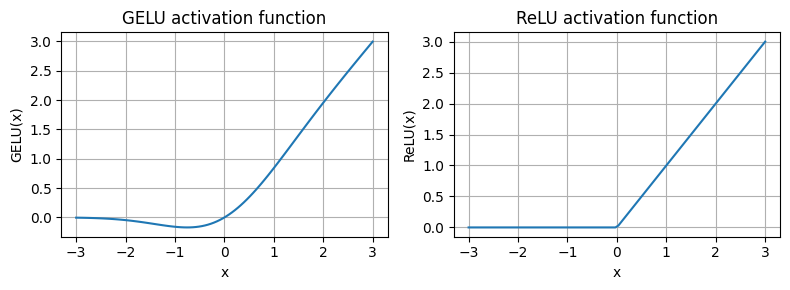

In [ ]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()


As we can see in the resulting plot, ReLU is a piecewise linear function that
outputs the input directly if it is positive; otherwise, it outputs zero.

GELU is a smooth, nonlinear function that approximates ReLU but with a non-zero gradient for negative values.


The smoothness of GELU, as shown in the above figure, can lead to better optimization properties
during training, as it allows for more nuanced adjustments to the model's parameters.

In contrast, ReLU has a sharp corner at zero, which can sometimes make optimization harder,
especially in networks that are very deep or have complex architectures.

Moreover, unlike RELU, which outputs zero for any negative input, GELU allows for a small, non-zero output
for negative values.

This characteristic means that during the training process, neurons that
receive negative input can still contribute to the learning process, albeit to a lesser extent
than positive inputs.

Next, let's use the GELU function to implement the small neural network module,
FeedForward, that we will be using in the LLM's transformer block later:

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
print(GPT_CONFIG_124M["emb_dim"])


768


As we can see in the preceding code, the FeedForward module is a small neural network
consisting of two Linear layers and a GELU activation function.

In the 124 million parameter GPT model, it receives the input batches with tokens that have an embedding
size of 768 each via the GPT_CONFIG_124M dictionary where GPT_CONFIG_124M["emb_dim"]
= 768.


Let's use the GELU function to implement the small neural network module,
FeedForward, that we will be using in the LLM's transformer block later

In [ ]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


The FeedForward module we implemented in this section plays a crucial role in enhancing
the model's ability to learn from and generalize the data.


Although the input and output dimensions of this module are the same, it internally expands the embedding dimension
into a higher-dimensional space through the first linear layer.

This expansion is followed by a non-linear GELU activation, and then a contraction back to
the original dimension with the second linear transformation.

Such a design allows for the
exploration of a richer representation space.

Moreover, the uniformity in input and output dimensions simplifies the architecture by
enabling the stacking of multiple layers, as we will do later, without the need to adjust
dimensions between them, thus making the model more scalable.

## **GPT ARCHITECTURE PART 4: SHORTCUT CONNECTIONS**

Let us see how we can add shortcut connections to the forward method

In [ ]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x


The code implements a deep neural network with 5 layers, each consisting of a Linear
layer and a GELU activation function.

In the forward pass, we iteratively pass the input
through the layers and optionally add the shortcut connections  if
the self.use_shortcut attribute is set to True.

Let's use this code to first initialize a neural network without shortcut connections. Here,
each layer will be initialized such that it accepts an example with 3 input values and returns
3 output values. The last layer returns a single output value

In [ ]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specify random seed for the initial weights for reproducibility
model_without_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=False
)

Next, we implement a function that computes the gradients in the the model's backward
pass

In [ ]:
def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In the preceding code, we specify a loss function that computes how close the model output
and a user-specified target (here, for simplicity, the value 0) are.

Then, when calling loss.backward(), PyTorch computes the loss gradient for each layer in the model.

We can iterate through the weight parameters via model.named_parameters().

Suppose we have a 3×3 weight parameter matrix for a given layer.

In that case, this layer will have 3×3 gradient values, and we print the mean absolute gradient of these 3×3 gradient values to
obtain a single gradient value per layer to compare the gradients between layers more
easily.

In short, the .backward() method is a convenient method in PyTorch that computes loss
gradients, which are required during model training, without implementing the math for the
gradient calculation ourselves, thereby making working with deep neural networks much
more accessible.

Let's now use the `print_gradients` function and apply it to the model without skip
connections

In [ ]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


As we can see based on the output of the print_gradients function, the gradients become
smaller as we progress from the last layer (layers.4) to the first layer (layers.0), which
is a phenomenon called the vanishing gradient problem.

Let's now instantiate a model with skip connections and see how it compares

In [ ]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169798612594604
layers.1.0.weight has gradient mean of 0.20694111287593842
layers.2.0.weight has gradient mean of 0.3289700150489807
layers.3.0.weight has gradient mean of 0.26657330989837646
layers.4.0.weight has gradient mean of 1.3258544206619263


As we can see, based on the output, the last layer (layers.4) still has a larger gradient
than the other layers.

However, the gradient value stabilizes as we progress towards the
first layer (layers.0) and doesn't shrink to a vanishingly small value.

In conclusion, shortcut connections are important for overcoming the limitations posed
by the vanishing gradient problem in deep neural networks.

Shortcut connections are a core building block of very large models such as LLMs, and they will help facilitate more effective
training by ensuring consistent gradient flow across layers when we train the GPT model

## **GPT ARCHITECTURE PART 5: CODING ATTENTION AND LINEAR LAYERS IN A TRANSFORMER BLOCK**

Let us code a transformer block as follows

Step 1: Shortcut connection for attention block

Step 2:  Shortcut connection for feed forward block

Step 3: Add the original input back

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        """
        A single Transformer block that combines:
        1. Multi-Head Self-Attention
        2. Feed-Forward Network
        3. Layer Normalization
        4. Residual (skip) connections
        5. Dropout regularization

        Args:
            cfg (dict): Configuration dictionary containing:
                - emb_dim: Embedding dimension (input/output feature size)
                - context_length: Maximum number of tokens (sequence length)
                - n_heads: Number of attention heads
                - drop_rate: Dropout rate
                - qkv_bias: Whether to use bias in query/key/value projections
        """
        super().__init__()

        # Multi-Head Self-Attention layer
        # This lets each token "attend" to (look at) other tokens in the sequence
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],            # Input embedding dimension
            d_out=cfg["emb_dim"],           # Output dimension (same as input)
            context_length=cfg["context_length"],  # Sequence length (number of tokens)
            num_heads=cfg["n_heads"],       # Number of parallel attention heads
            dropout=cfg["drop_rate"],       # Dropout applied inside attention
            qkv_bias=cfg["qkv_bias"]        # Whether to use bias terms in Q, K, V projections
        )

        # Feed-forward sublayer (position-wise fully connected network)
        # Usually consists of two linear layers with a GELU/ReLU activation
        self.ff = FeedForward(cfg)

        # First Layer Normalization (applied before attention)
        self.norm1 = LayerNorm(cfg["emb_dim"])

        # Second Layer Normalization (applied before feed-forward)
        self.norm2 = LayerNorm(cfg["emb_dim"])

        # Dropout applied to residual (shortcut) connections to prevent overfitting
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        """
        Forward pass through the Transformer block.

        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, num_tokens, emb_dim]

        Returns:
            torch.Tensor: Output tensor of the same shape as input
        """

        # ==============================
        # 1️⃣ Attention Sub-Layer
        # ==============================

        # Save input as shortcut (for residual connection)
        shortcut = x

        # Apply layer normalization before attention
        x = self.norm1(x)

        # Apply multi-head self-attention
        # Each token attends to other tokens and aggregates contextual info
        x = self.att(x)  # Shape: [batch_size, num_tokens, emb_dim]

        # Apply dropout to attention output for regularization
        x = self.drop_shortcut(x)

        # Add the original input (residual connection)
        # Helps prevent vanishing gradients and preserves original information
        x = x + shortcut

        # ==============================
        # 2️⃣ Feed-Forward Sub-Layer
        # ==============================

        # Save input again for another residual connection
        shortcut = x

        # Apply layer normalization before feed-forward network
        x = self.norm2(x)

        # Pass through the feed-forward network
        x = self.ff(x)

        # Apply dropout to feed-forward output
        x = self.drop_shortcut(x)

        # Add the shortcut again (residual connection)
        x = x + shortcut

        # ==============================
        # 3️⃣ Output
        # ==============================

        # Return the transformed tensor (same shape as input)
        return x


The given code defines a TransformerBlock class in PyTorch that includes a multi-head
attention mechanism (MultiHeadAttention) and a feed forward network (FeedForward),
both configured based on a provided configuration dictionary (cfg), such as
GPT_CONFIG_124M

Layer normalization (LayerNorm) is applied before each of these two components, and
dropout is applied after them to regularize the model and prevent overfitting.

This is also known as Pre-LayerNorm.

Older architectures, such as the original transformer model,
applied layer normalization after the self-attention and feed-forward networks instead,
known as Post-LayerNorm, which often leads to worse training dynamics.

The class also implements the forward pass, where each component is followed by a
shortcut connection that adds the input of the block to its output. This critical feature helps
gradients flow through the network during training and improves the learning of deep
models

Using the GPT_CONFIG_124M dictionary we defined earlier, let's instantiate a transformer
block and feed it some sample data

Create sample input of shape [batch_size, num_tokens, emb_dim]

In [ ]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768) #A
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


As we can see from the code output, the transformer block maintains the input dimensions
in its output, indicating that the transformer architecture processes sequences of data
without altering their shape throughout the network.

  
The preservation of shape throughout the transformer block architecture is not incidental
but a crucial aspect of its design.

This design enables its effective application across a wide
range of sequence-to-sequence tasks, where each output vector directly corresponds to an
input vector, maintaining a one-to-one relationship.

However, the output is a context vector
that encapsulates information from the entire input sequence.

This means that while the physical dimensions of the sequence (length and feature size)
remain unchanged as it passes through the transformer block, the content of each output
vector is re-encoded to integrate contextual information from across the entire input
sequence.

## **GPT ARCHITECTURE PART 6: ENTIRE GPT MODEL ARCHITECTURE IMPLEMENTATION**

The device setting will allow us to train the model on a CPU or GPU, depending on which device the input
data sits

In [ ]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        """
        GPTModel — A simplified Generative Pretrained Transformer (GPT)-style model.

        This model processes sequences of token IDs and predicts the next token
        in a sequence using a stack of Transformer blocks.

        Args:
            cfg (dict): Configuration dictionary containing:
                - vocab_size: Total number of unique tokens (vocabulary size)
                - emb_dim: Embedding dimension (size of each token vector)
                - context_length: Maximum number of tokens in one input sequence
                - drop_rate: Dropout probability (for regularization)
                - n_layers: Number of stacked Transformer blocks
        """
        super().__init__()

        # ===============================
        # 1️⃣ Embedding Layers
        # ===============================

        # Token embedding: Converts token indices into continuous embedding vectors
        # Shape after embedding → [batch_size, seq_len, emb_dim]
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])

        # Positional embedding: Adds information about token positions in the sequence
        # Each position (0, 1, 2, … context_length-1) has its own embedding vector
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])

        # Dropout layer for regularization applied to embeddings
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # ===============================
        # 2️⃣ Transformer Blocks
        # ===============================

        # Stack of multiple Transformer blocks (each block = attention + feedforward)
        # The '*' operator unpacks the list of blocks inside nn.Sequential
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )

        # ===============================
        # 3️⃣ Final Layers
        # ===============================

        # Layer normalization applied after all transformer layers
        # This helps stabilize the output representations
        self.final_norm = LayerNorm(cfg["emb_dim"])

        # Linear layer (output head): Maps each token’s embedding
        # to a vector of size 'vocab_size' — i.e., prediction logits for each token
        # No bias term because embedding and output projections often share weights
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        """
        Forward pass through the GPT model.

        Args:
            in_idx (torch.Tensor): Input tensor of token indices,
                                   shape [batch_size, seq_len]

        Returns:
            logits (torch.Tensor): Predicted unnormalized probabilities for each token,
                                   shape [batch_size, seq_len, vocab_size]
        """
        # Extract batch size and sequence length from the input tensor
        batch_size, seq_len = in_idx.shape

        # ===============================
        # 1️⃣ Token + Positional Embeddings
        # ===============================

        # Get token embeddings for each input token ID
        tok_embeds = self.tok_emb(in_idx)  # Shape: [batch_size, seq_len, emb_dim]

        # Create position indices (0 to seq_len-1) and get their embeddings
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))

        # Combine token embeddings with position embeddings
        # Adds positional information to each token representation
        x = tok_embeds + pos_embeds  # Shape: [batch_size, seq_len, emb_dim]

        # Apply dropout to prevent overfitting
        x = self.drop_emb(x)

        # ===============================
        # 2️⃣ Transformer Encoder Blocks
        # ===============================

        # Pass embeddings through the stack of Transformer blocks
        # Each block performs self-attention + feed-forward processing
        x = self.trf_blocks(x)

        # Apply final layer normalization
        x = self.final_norm(x)

        # ===============================
        # 3️⃣ Output Projection
        # ===============================

        # Project each embedding vector to vocabulary logits
        # This produces predictions for the next token at each position
        logits = self.out_head(x)  # Shape: [batch_size, seq_len, vocab_size]

        # Return logits (to be used with cross-entropy loss during training)
        return logits

  
The `__init__` constructor of this GPTModel class initializes the token and positional
embedding layers using the configurations passed in via a Python dictionary, cfg.

These
embedding layers are responsible for converting input token indices into dense vectors and
adding positional information.

   
Next, the `__init__` method creates a sequential stack of TransformerBlock modules
equal to the number of layers specified in cfg.

Following the transformer blocks, a
LayerNorm layer is applied, standardizing the outputs from the transformer blocks to
stabilize the learning process.

Finally, a linear output head without bias is defined, which
projects the transformer's output into the vocabulary space of the tokenizer to generate
logits for each token in the vocabulary.

   
The forward method takes a batch of input token indices, computes their embeddings,
applies the positional embeddings, passes the sequence through the transformer blocks,
normalizes the final output, and then computes the logits, representing the next token's
unnormalized probabilities. We will convert these logits into tokens and text outputs in the
next section.

Let's now initialize the 124 million parameter GPT model using the GPT_CONFIG_124M
dictionary we pass into the cfg parameter and feed it with the batch text input we created
at the beginning of this chapter

In [ ]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.3613,  0.4222, -0.0711,  ...,  0.3483,  0.4661, -0.2838],
         [-0.1792, -0.5660, -0.9485,  ...,  0.0477,  0.5181, -0.3168],
         [ 0.7120,  0.0332,  0.1085,  ...,  0.1018, -0.4327, -0.2553],
         [-1.0076,  0.3418, -0.1190,  ...,  0.7195,  0.4023,  0.0532]],

        [[-0.2564,  0.0900,  0.0335,  ...,  0.2659,  0.4454, -0.6806],
         [ 0.1230,  0.3653, -0.2074,  ...,  0.7705,  0.2710,  0.2246],
         [ 1.0558,  1.0318, -0.2800,  ...,  0.6936,  0.3205, -0.3178],
         [-0.1565,  0.3926,  0.3288,  ...,  1.2630, -0.1858,  0.0388]]],
       grad_fn=<UnsafeViewBackward0>)


As we can see, the output tensor has the shape [2, 4, 50257], since we passed in 2 input
texts with 4 tokens each. The last dimension, 50,257, corresponds to the vocabulary size of
the tokenizer. In the next section, we will see how to convert each of these 50,257-
dimensional output vectors back into tokens.

Using the numel() method, short for "number of elements," we can collect the total
number of parameters in the model's parameter tensors

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


Earlier, we spoke of initializing a 124
million parameter GPT model, so why is the actual number of parameters 163 million, as
shown in the preceding code output?

The reason is a concept called weight tying that is used in the original GPT-2
architecture, which means that the original GPT-2 architecture is reusing the weights from
the token embedding layer in its output layer.

To understand what this means, let's take a
look at the shapes of the token embedding layer and linear output layer that we initialized
on the model via the GPTModel earlier

In [ ]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


As we can see based on the print outputs, the weight tensors for both these layers have the
same shape

The token embedding and output layers are very large due to the number of rows for the
50,257 in the tokenizer's vocabulary. Let's remove the output layer parameter count from
the total GPT-2 model count according to the weight tying

In [ ]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


As we can see, the model is now only 124 million parameters large, matching the original
size of the GPT-2 model.

   
Weight tying reduces the overall memory footprint and computational complexity of the
model. However, in my experience, using separate token embedding and output layers
results in better training and model performance; hence, we are using separate layers in
our GPTModel implementation. The same is true for modern LLMs.

Lastly, let us compute the memory requirements of the 163 million parameters in our
GPTModel object

In [ ]:
total_size_bytes = total_params * 4 #A
total_size_mb = total_size_bytes / (1024 * 1024) #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


   
In conclusion, by calculating the memory requirements for the 163 million parameters in
our GPTModel object and assuming each parameter is a 32-bit float taking up 4 bytes, we
find that the total size of the model amounts to 621.83 MB, illustrating the relatively large
storage capacity required to accommodate even relatively small LLMs.

   
In this section, we implemented the GPTModel architecture and saw that it outputs
numeric tensors of shape [batch_size, num_tokens, vocab_size]. In the next section,
we will write the code to convert these output tensors into text.

## **GPT ARCHITECTURE PART 7: GENERATING TEXT FROM OUTPUT TOKENS**

Let us implement the token-generation process as follows

Step 1: idx is a (batch, n_tokens) array of indices in the current context

Step 2: Crop current context if it exceeds the supported context size E.g., if LLM supports only 5 tokens, and the
context size is 10 then only the last 5 tokens are used as context

Step 3: Focus only on the last time step, so that (batch, n_token, vocab_size) becomes (batch, vocab_size)

Step 4: probas has shape (batch, vocab_size)

Step 5: idx_next has shape (batch, 1)

Step 6: Append sampled index to the running sequence, where idx has shape (batch, n_tokens+1)

In [ ]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

   
In the preceeding code, the generate_text_simple function, we use a softmax function to
convert the logits into a probability distribution from which we identify the position with the
highest value via torch.argmax.

The softmax function is monotonic, meaning it preserves
the order of its inputs when transformed into outputs.

So, in practice, the softmax step is
redundant since the position with the highest score in the softmax output tensor is the
same position in the logit tensor.

In other words, we could apply the torch.argmax function
to the logits tensor directly and get identical results.

However, we coded the conversion to
illustrate the full process of transforming logits to probabilities, which can add additional
intuition, such as that the model generates the most likely next token, which is known as
greedy decoding.

    
In the next chapter, when we will implement the GPT training code, we will also
introduce additional sampling techniques where we modify the softmax outputs such that
the model doesn't always select the most likely token, which introduces variability and
creativity in the generated text.

Let's now try out the generate_text_simple function with the "Hello, I am" context
as model input

First, we encode the input context into token IDs:

In [ ]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) #A
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


Next, we put the model into `.eval()` mode, which disables random components like
dropout, which are only used during training, and use the generate_text_simple function
on the encoded input tensor

We disable dropout since we are not training the model

In [ ]:
model.eval() #A
out = generate_text_simple(
model=model,
idx=encoded_tensor,
max_new_tokens=6,
context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


Using the .decode method of the tokenizer, we can convert the IDs back into text

In [ ]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


As we can see, based on the preceding output, the model generated gibberish, which is not
at all coherent text.

What happened?

The reason why the model is unable to produce coherent text is that we haven't trained it yet.

So far, we just
implemented the GPT architecture and initialized a GPT model instance with initial random
weights.

# **EVALUATING GENERATIVE TEXT MODELS**

### **GPT Model class we coded earlier**

In [ ]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

### **Using GPT to generate text**

We initialize a GPT model using the code from the previous chapter

In [ ]:
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();  # Disable dropout during inference

We reduce the context length (context_length) of only 256 tokens to reduce the computational resource requirements for training the model, whereas the original 124 million parameter GPT-2 model used 1024 tokens

This is so that more readers will be able to follow and execute the code examples on their laptop computer

Next, we use the `generate_text_simple` function from the previous chapter to generate text.

In addition, we define two convenience functions, `text_to_token_ids and `token_ids_to_text`, for converting between token and text representations that we use throughout this chapter

In [ ]:
import tiktoken

def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren


As we can see above, the model does not produce good text because it has not been trained yet

How do we measure or capture what "good text" is, in a numeric form, to track it during training?

The next subsection introduces metrics to calculate a loss metric for the generated outputs that we can use to measure the training progress

The next chapters on finetuning LLMs will also introduce additional ways to measure model quality


### **Calculating the text generation loss: cross-entropy and perplexity**

Suppose we have an inputs tensor containing the token IDs for 2 training examples (rows)

Corresponding to the inputs, the targets contain the desired token IDs that we want the model to generate

Notice that the targets are the inputs shifted by 1 position, as explained in chapter 2 when we implemented the data loader

In [ ]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
                       [40,    1107, 588]])   #  "I really like"]

targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
                        [1107,  588, 11311]]) #  " really like chocolate"]

Feeding the inputs to the model, we obtain the logits vector for the 2 input examples that consist of 3 tokens each

Each of the tokens is a 50,257-dimensional vector corresponding to the size of the vocabulary

Applying the softmax function, we can turn the logits tensor into a tensor of the same dimension containing probability scores

In [ ]:
with torch.no_grad():
    logits = model(inputs)

probas = torch.softmax(logits, dim=-1) # Probability of each token in vocabulary
print(probas.shape) # Shape: (batch_size, num_tokens, vocab_size)

torch.Size([2, 3, 50257])


As discussed in the previous chapter, we can apply the argmax function to convert the probability scores into predicted token IDs.

The softmax function above produced a 50,257-dimensional vector for each token; the argmax function returns the position of the highest probability score in this vector, which is the predicted token ID for the given token.

Since we have 2 input batches with 3 tokens each, we obtain 2 by 3 predicted token IDs:

In [ ]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


If we decode these tokens, we find that these are quite different from the tokens we want the model to predict, namely the target tokens.

That's because the model wasn't trained yet.

To train the model, we need to know how far it is away from the correct predictions (targets)

In [ ]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Armed heNetflix


### **Cross-entropy loss**

The token probabilities corresponding to the target indices are as follows:


In [ ]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)

text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)

Text 1: tensor([    0.0001,     0.0000,     0.0000])
Text 2: tensor([    0.0000,     0.0001,     0.0000])


We want to maximize all these values, bringing them close to a probability of 1.
    
In mathematical optimization, it is easier to maximize the logarithm of the probability score than the probability score itself.

In [ ]:
# Compute logarithm of all token probabilities
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])


Next, we compute the average log probability:

In [ ]:
# Calculate the average probability for each token
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7940)


The goal is to make this average log probability as large as possible by optimizing the model weights.

Due to the log, the largest possible value is 0, and we are currently far away from 0.

In deep learning, instead of maximizing the average log-probability, it's a standard convention to minimize the negative average log-probability value; in our case, instead of maximizing -10.7722 so that it approaches 0, in deep learning, we would minimize 10.7722 so that it approaches 0.

The value negative of -10.7722, i.e., 10.7722, is also called cross-entropy loss in deep learning.

In [ ]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.7940)


PyTorch already implements a cross_entropy function that carries out the previous steps

Before we apply the cross_entropy function, let's check the shape of the logits and targets

In [ ]:
# Logits have shape (batch_size, num_tokens, vocab_size)
print("Logits shape:", logits.shape)

# Targets have shape (batch_size, num_tokens)
print("Targets shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


For the cross_entropy function in PyTorch, we want to flatten these tensors by combining them over the batch dimension

In [ ]:
logits_flat = logits.flatten(0, 1)
targets_flat = targets.flatten()

print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)

Note that the targets are the token IDs, which also represent the index positions in the logits tensors that we want to maximize.
    
The cross_entropy function in PyTorch will automatically take care of applying the softmax and log-probability computation internally over those token indices in the logits that are to be maximized

In [ ]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

### **Perplexity**

A concept related to the cross-entropy loss is the perplexity of an LLM.

The perplexity is simply the exponential of the cross-entropy loss.

In [ ]:
perplexity = torch.exp(loss)
print(perplexity)

The perplexity is often considered more interpretable because it can be understood as the effective vocabulary size that the model is uncertain about at each step (in the example above, that'd be 48,725 words or tokens).

In other words, perplexity provides a measure of how well the probability distribution predicted by the model matches the actual distribution of the words in the dataset.
    
Similar to the loss, a lower perplexity indicates that the model predictions are closer to the actual distribution

### **Calculating the training and validation set losses**

We use a relatively small dataset for training the LLM (in fact, only one short story)

The reasons are:

You can run the code examples in a few minutes on a laptop computer without a suitable GPU.

The training finishes relatively fast (minutes instead of weeks), which is good for educational purposes.
    
We use a text from the public domain, which can be included in this GitHub repository without violating any usage rights or bloating the repository size.
    
For example, Llama 2 7B required 184,320 GPU hours on A100 GPUs to be trained on 2 trillion tokens

At the time of this writing, the hourly cost of an 8xA100 cloud server at AWS is approximately 30 dollars.

So, via an off-the-envelope calculation, training this LLM would cost 184,320 / 8 * 30 = 690,000 dollars



In [ ]:
import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

A quick check that the text loaded ok by printing the first and last 100 words

In [ ]:
# First 100 characters
print(text_data[:99])

I had always thought Jack Gisburn rather a cheap genius--though a

good fellow enough--so it was no


In [ ]:
# Last 100 characters
print(text_data[-99:])

and alone, and happen once--but

there's no exterminating our kind of art."

The End of The Verdict


In [ ]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

With 5,145 tokens, the text is very short for training an LLM, but again, it's for educational purposes (we will also load pretrained weights later).

Next, we divide the dataset into a training and a validation set and use the data loaders from chapter 2 to prepare the batches for LLM training.
    
For visualization purposes, the figure below assumes a max_length=6, but for the training loader, we set the max_length equal to the context length that the LLM supports.

Since we train the LLM to predict the next word in the text, the targets look the same as these inputs, except that the targets are shifted by one position    

In [ ]:
# Train/validation ratio
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]


torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [ ]:
# Sanity check

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "increase the `training_ratio`")

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "decrease the `training_ratio`")

We use a relatively small batch size to reduce the computational resource demand, and because the dataset is very small to begin with.

Llama 2 7B was trained with a batch size of 1024, for example.

An optional check that the data was loaded correctly

In [ ]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

An optional check that the data was loaded correctly

In [ ]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)

Next, we implement a utility function to calculate the cross-entropy loss of a given batch.

In addition, we implement a second utility function to compute the loss for a user-specified number of batches in a data loader

In [ ]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

If you have a machine with a CUDA-supported GPU, the LLM will train on the GPU without making any changes to the code.
    
Via the device setting, we ensure that the data is loaded onto the same device as the LLM model.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#
# print(f"Using {device} device.")


model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.97004451751709
Validation loss: 10.984174728393555
